In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

## Simple Linear Regression using sklearn

In [8]:
df = pd.read_csv('real_estate_price_size.csv')

In [39]:
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


#### Declaring the dependent and independent variables

In [9]:
x1 = df[['size']].values 
y = df['price'].values  

#### Ensuring X is reshaped correctly

In [10]:
x1 = x1.reshape(-1, 1)


#### Creating and training the linear regression model

In [11]:
model = LinearRegression()
model.fit(x1, y)


LinearRegression()


#### Making predictions for the entire dataset

In [13]:
y_pred = model.predict(x1)

#### Computing Mean Squared Error

In [21]:
mse = mean_squared_error(y, y_pred)
mse

1500320708.6628919

#### Making a prediction for a single new size value

In [17]:
new_size = np.array([[750]])  # Reshaped to (1, 1)
predicted_price = model.predict(new_size)
predicted_price

array([269296.65874718])

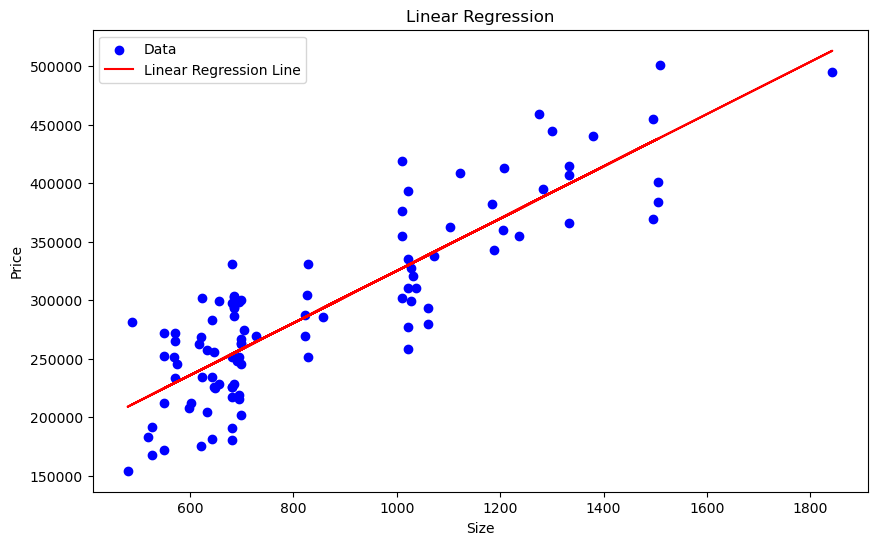

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


## Multiple Linear Regression

In [59]:
data=pd.read_csv('data.csv')

In [60]:
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


### Declaring the dependent and independent variables

In [62]:
x = data[['SAT','Rand 1,2,3']]
y0= data['GPA']

### Regression itself

In [63]:
regre = LinearRegression()
regre.fit(x,y0)

LinearRegression()

In [64]:
y_prediction = regre.predict(x)

In [65]:
mse = mean_squared_error(y0, y_prediction)
mse

0.043251494565310245

In [66]:
new_sat_score = np.array([[1700,2]]) 
predicted_gpa = model.predict(new_sat_score)
predicted_gpa[0]

2.588336947634114

### Polynomial Regression

### Using the same dataset and same dependent and independent variables

#### Transforming the features to polynomial features

In [126]:

degree = 2 
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)


#### Creating and training the polynomial regression model

In [127]:

model = LinearRegression()
model.fit(x_poly, y0)
y_pred = model.predict(x_poly)
mse = mean_squared_error(y0, y_pred)
mse


0.04120766075263052

#### Make a prediction for new SAT and Rand 1,2,3 values

In [128]:

new_data = pd.DataFrame({'SAT': [1700], 'Rand 1,2,3': [2]})  # Example new data
new_data_poly = poly.transform(new_data)
predicted_gpa = model.predict(new_data_poly)
predicted_gpa[0]



3.098801553447328

#### Visualization: plot the actual and predicted GPA against SAT score, keeping Rand 1,2,3 constant

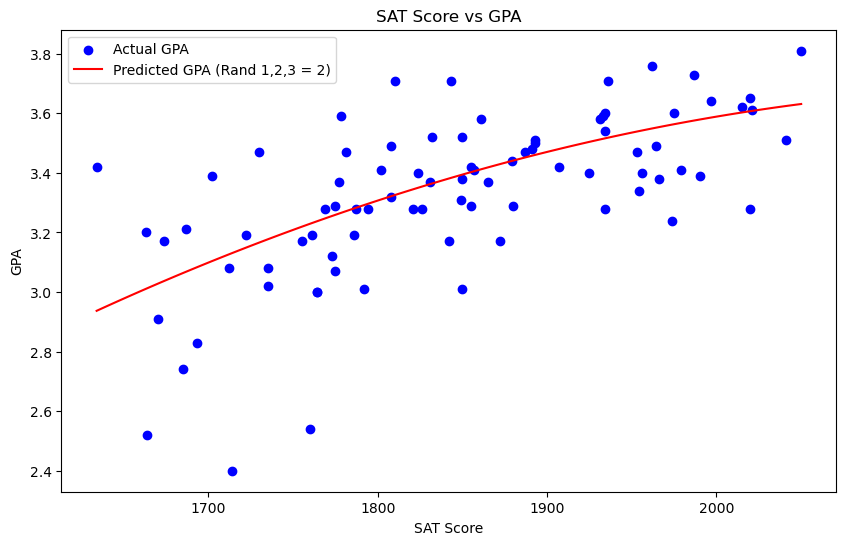

In [130]:

plt.figure(figsize=(10, 6))
plt.scatter(data['SAT'], y0, color='blue', label='Actual GPA')
sat_range = np.linspace(min(data['SAT']), max(data['SAT']), 100)
rand_fixed = 2  
sat_rand_fixed = pd.DataFrame({'SAT': sat_range, 'Rand 1,2,3': [rand_fixed] * len(sat_range)})
sat_rand_fixed_poly = poly.transform(sat_rand_fixed)
gpa_pred_fixed_rand = model.predict(sat_rand_fixed_poly)
plt.plot(sat_range, gpa_pred_fixed_rand, color='red', label=f'Predicted GPA (Rand 1,2,3 = {rand_fixed})')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('SAT Score vs GPA')
plt.legend()
plt.show()


## Decision Tree Regression

In [105]:
data2 = {
    'SquareFeet': [1500, 1800, 2000, 2200, 2500, 2700, 3000, 3200, 3500, 4000],
    'NumBedrooms': [3, 4, 3, 5, 4, 5, 4, 6, 5, 6],
    'Price': [300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000]
}
df2 = pd.DataFrame(data2)

In [106]:
df2


,SquareFeet,NumBedrooms,Price
0,1500,3,300000
1,1800,4,350000
2,2000,3,400000
3,2200,5,450000
4,2500,4,500000
5,2700,5,550000
6,3000,4,600000
7,3200,6,650000
8,3500,5,700000
9,4000,6,750000



### Defining independent and dependent variables

In [107]:
X = df2[['SquareFeet', 'NumBedrooms']]
Y = df2['Price']

### Creating and train the Decision Tree Regressor model

In [119]:
model = DecisionTreeRegressor()
model.fit(X, Y)
Y_pred = model.predict(X)
mse = mean_squared_error(Y, Y_pred)
mse

0.0

In [114]:
new_data = pd.DataFrame({'SquareFeet': [2500], 'NumBedrooms': [4]})
predicted_price = model.predict(new_data)
predicted_price

array([500000.])

### Plot for SquareFeet

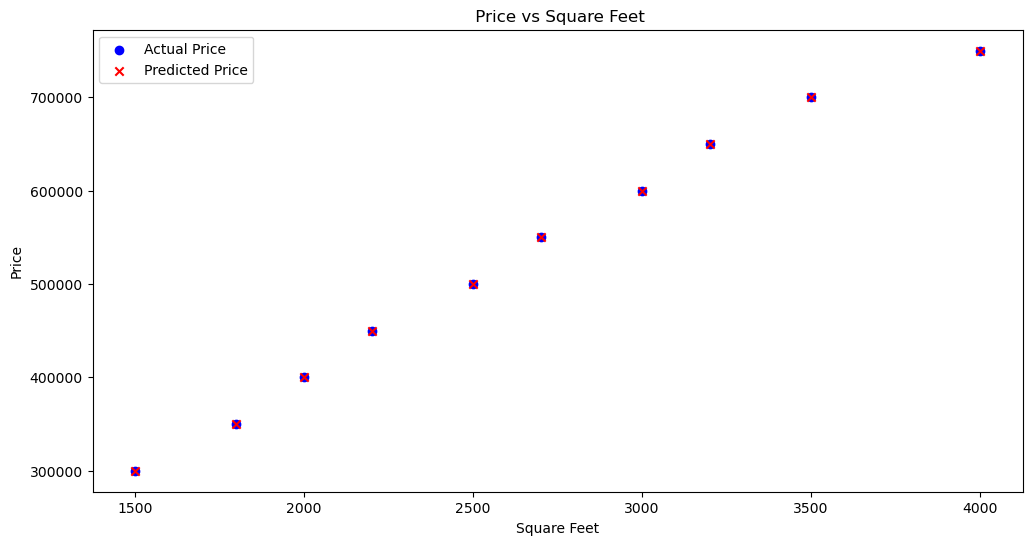

In [121]:
plt.figure(figsize=(12, 6))
plt.scatter(df2['SquareFeet'], Y, color='blue', label='Actual Price')
plt.scatter(df2['SquareFeet'], Y_pred, color='red', label='Predicted Price', marker='x')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title(' Price vs Square Feet')
plt.legend()
plt.show()

### Plot for NumBedrooms

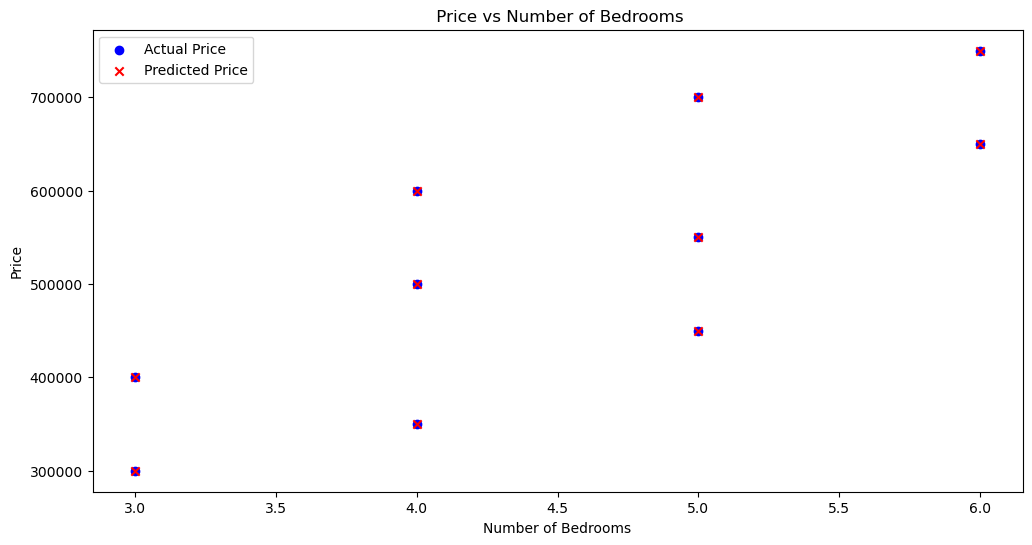

In [122]:
plt.figure(figsize=(12, 6))
plt.scatter(df2['NumBedrooms'], Y, color='blue', label='Actual Price')
plt.scatter(df2['NumBedrooms'], Y_pred, color='red', label='Predicted Price', marker='x')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title(' Price vs Number of Bedrooms')
plt.legend()
plt.show()
